### Analyzing CIA Factbook Data Using SQLite and Python

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

conn = sqlite3.connect("factbook.db")
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
query = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [8]:
# minimum population, maximum population, minimum population growth, maximum population growth
query = "SELECT MIN(population) AS Min_Population,MAX(population) AS Max_Population, MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(query, conn)

,Min_Population,Max_Population,MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [9]:
query = "SELECT name FROM facts WHERE population = 0;"
pd.read_sql_query(query, conn)

,name
0,Antarctica


In [10]:
query = "SELECT name FROM facts WHERE population = 7256490011;"
pd.read_sql_query(query, conn)

,name
0,World


In [24]:
query = "SELECT * FROM facts WHERE population != 7256490011 AND population != 0;"
new_table = pd.read_sql_query(query, conn)
new_table

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550,0.55,9.41,9.42,5.56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8408f0cd30>,
      dtype=object)

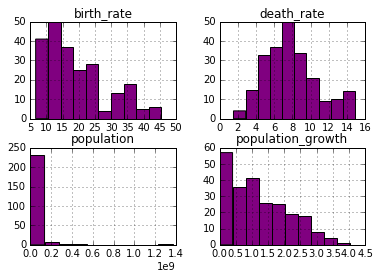

In [28]:
# Using just the non-outlier rows, generate a 2 by 2 grid of histograms:
# population / population_growth / birth_rate / death_rate

cols = ['population','population_growth','birth_rate','death_rate'] 
new_table.hist(column=cols, color='purple')


In [31]:
# Which countries have the highest population density? ratio of population to land area.

query = "SELECT name, population / area_land AS density FROM facts ORDER BY density DESC;"
density = pd.read_sql_query(query, conn)
density

,name,density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8408976828>]],
      dtype=object)

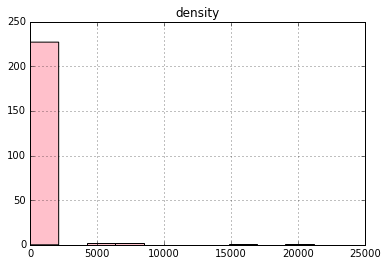

In [33]:
density.hist(color = 'pink')